# Code for Experiment 1 - Kirchhoff's laws and Ohm's law

In [1]:
# dependencies
import matplotlib.pyplot as plt
import numpy as np

## Part 1 - A non-trivial circuit

### Calculating branch currents

In [2]:
coefficient_matrix = np.array([[100,330,0,1000,0,0],[0,-330,1000,0,0,-220],[0,0,0,-1000,330,220],[1,-1,-1,0,0,0],[0,1,0,-1,0,-1],[0,0,1,0,-1,1]])
b = np.array([10,0,0,0,0,0])
x = np.linalg.solve(coefficient_matrix, b)

for i in range(len(x)):
    print(f'I_{i+1} = {x[i]}')
    #print(i)

I_1 = 0.01566926345609065
I_2 = 0.010800283286118978
I_3 = 0.0048689801699716715
I_4 = 0.004868980169971672
I_5 = 0.010800283286118982
I_6 = 0.005931303116147309


## Part 2 - The line of resistors - A model of heat conduction

### Calculating resistance for different chain lengths

In [5]:
# Resistances
R_1 = 100  # k Ohm
R_2 = 1000 # k Ohm

# Number of links in chain
N = 4

# Calculating resistance for chain of one link
R_eq1 = R_1 + R_2

# Calculate resistances for longer chain
resistances = [R_eq1]
R_eq_prev = R_eq1
for i in range(N - 1):
    R_eq_N = R_1 + 1 / (1 / R_2 + 1 / R_eq_prev)
    R_eq_prev = R_eq_N
    resistances.append(R_eq_N)

# Print results
print("Number of links | Chain resistance")
print("----------------------------------")
for i in range(len(resistances)):
    print(f"        {i+1}       | {resistances[i]} kOhm")

Number of links | Chain resistance
----------------------------------
        1       | 1100 kOhm
        2       | 623.8095238095239 kOhm
        3       | 484.1642228739003 kOhm
        4       | 426.22011460185735 kOhm


### Plotting resistance against number of links in chain

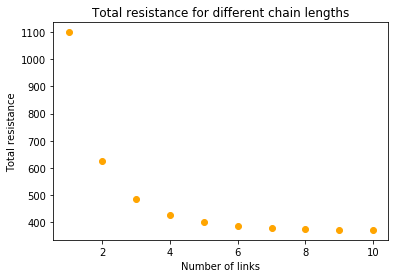

In [8]:
# Resistances
R_1 = 100  # k ohm
R_2 = 1000  # k ohm

# Number of links
N = 10
links = np.arange(1, N + 1, 1)
# print(links)

# Resistance for one link
R_tot_1 = R_1 + R_2
# print(R_tot_1)

# Computing resistances for several links
R_tot_array = [R_tot_1]
R_tot_prev = R_tot_1
for i in range(N - 1):
    R_tot_N = R_1 + 1 / (1 / R_2 + 1 / R_tot_prev)
    R_tot_prev = R_tot_N
    # print(R_tot_N)
    R_tot_array.append(R_tot_N)

# Plot resistance against number of links
plt.plot(links, R_tot_array, 'o', color='orange')
plt.title('Total resistance for different chain lengths')
plt.xlabel('Number of links')
plt.ylabel('Total resistance')
plt.show()